# Podstawy reprezentacji i analizy danych - projekt semestralny, semestr zimowy 2023

Patrycja Falkowska 325462 <br>Klaudia Jóźwik 325478

## Wprowadzenie
Niniejsza praca jest projektem zaliczeniowym na zajęcia Podstawy reprezentacji i analizy danych w semestrze zimowym 2023. Celem projektu jest zastosowanie umiejętności analizy danych do zrozumienia i wyciągnięcia istotnych informacji z dostępnych danych.

### Źródło Danych

Dane, które wykorzystujemy w projekcie, pochodzą ze strony https://www.kaggle.com/datasets/uciml/zoo-animal-classification/data.
W całym projekcie pracujemy na dwóch plikach - <span style="color:red">zoo.csv</span> oraz <span style="color:purple">class.csv</span>. W pierwszym z nich zawarte są informacje o zwierzętach w zoo, ich atrybutach i przypisaniu ich do jednej z klas. W drugim pliku znajdziemy rozwinięcie na temat klas - ich numer porządkowy, nazwę, ilość zwierząt w klasie etc..

## Kroki Projektu

Projekt będzie obejmować następujące kroki:

1. **Załadowanie Danych:** Wczytanie danych ze źródła i wyświetlenie danych.
2. **Czyszczenie Danych:** Przegląd i oczyszczenie danych z ewentualnych braków.
3. **Eksploracja Danych:** Analiza rozkładu danych, statystyk opisowych, wizualizacja istotnych informacji.
4. **Analiza Korelacji:** Badanie korelacji między różnymi zmiennymi.
5. **Wnioski:** Podsumowanie analizy, wyciągnięcie kluczowych wniosków.

## Struktura Notebooka

1. Wczytanie Danych
2. Czyszczenie Danych
3. Eksploracja Danych
4. Analiza Korelacji
5. Wnioski



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
warnings.filterwarnings("ignore")


In [2]:
class1 = pd.read_csv("class.csv")
class1

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [3]:
d0 = pd.read_csv("zoo.csv")
d0.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# Zmiana class_type z liczby na nazwę klasy
d0['class_type'] = d0['class_type'].map(class1.set_index('Class_Number')['Class_Type'])

# Liczba obiektów 
num_objects = d0.shape[0]

# Liczba klas
num_classes = d0['class_type'].nunique()

# liczba obiektów w każdej klasie
objects_per_class = d0['class_type'].value_counts()

#Liczba atrybutów
num_attributes = d0.shape[1]

# liczba danych brakujących
lost = []
for col in d0:
    for item in d0[col]:
        if(pd.isnull(item) == True):
            lost.append(1)
missing_data = len(lost)

# usunięcie danych brakujących
zoo = d0.dropna()

print("Liczba zwierząt:", num_objects)
print("Liczba klas:", num_classes)
print("Liczba atrybutów:", num_attributes)
print("Liczba obiektów w każdej klasie:")
for klasa, count in objects_per_class.items():
    print('Klasa ' + str(klasa) + " - " + str(count))
print("Liczba brakujacych danych:", missing_data)

#dane bez grup
data_ng = zoo.iloc[:,:-1]


Liczba zwierząt: 101
Liczba klas: 7
Liczba atrybutów: 18
Liczba obiektów w każdej klasie:
Klasa Mammal - 41
Klasa Bird - 20
Klasa Fish - 13
Klasa Invertebrate - 10
Klasa Bug - 8
Klasa Reptile - 5
Klasa Amphibian - 4
Liczba brakujacych danych: 0


Wnioski:
Analiza dostępnego zbioru danych pokazuje, że w badanej populacji istnieje bogata różnorodność gatunków, podzielonych na siedem głównych klas zwierząt. Klasa Ssaków (Mammal) wykazuje największą liczbę reprezentantów w zbiorze, co sugeruje ich znaczną dominację wśród analizowanych zwierząt. Z kolei klasa płazów (Amphibian) prezentuje się jako najmniej liczna, co sugeruje, że płazy mogą stanowić mniejszy odsetek populacji w porównaniu do innych klas.
Niezwykle niskie liczby reprezentantów klas gadów (Reptile) i owadów (Bug) wskazują na mniejszą różnorodność tych grup w badanej populacji, być może wynikającą z ograniczeń środowiskowych lub innych czynników. Natomiast równomierna reprezentacja ptaków (Bird), z umiarkowaną liczbą zwierząt, sugeruje, że ptaki są stosunkowo dobrze reprezentowane w zestawie danych, ale nie dominują tak wyraźnie jak ssaki.
Obecność 18 atrybutów dla każdego z 101 zwierząt wskazuje na szeroką gamę cech, które zostały uwzględnione w zbiorze danych. 

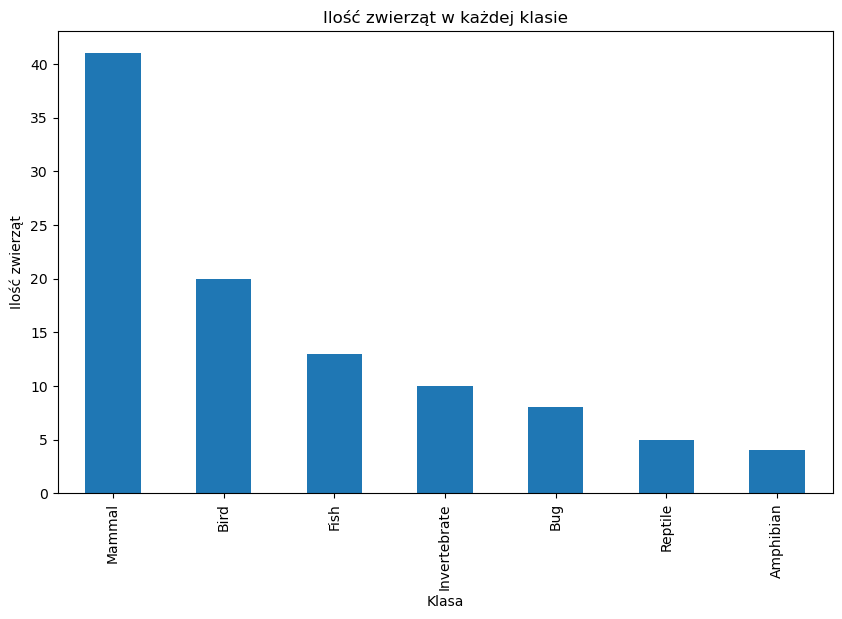

In [5]:
# Stworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
objects_per_class.plot(kind='bar')

# Dodanie tytułu i etykiet osi
plt.title('Ilość zwierząt w każdej klasie')
plt.xlabel('Klasa')
plt.ylabel('Ilość zwierząt')

# Pokaż wykres
plt.show()

Wnioski: 
    Podany wykres przedstawia porównaną ilość zwierząt w każdej klasie. Analiza zestawu danych dotyczących różnych klas zwierząt wyraźnie ukazuje zróżnicowanie liczby reprezentantów w poszczególnych klasach. Klasa Ssaków (Mammal) wyróżnia się największą liczbą zwierząt, przekraczającą czterdzieści, co wskazuje na ich znaczącą obecność w analizowanej populacji. Pozostałe klasy prezentują się zdecydowanie mniej licznie: klasa Ptaków (Bird) obejmuje dwadzieścia osobników, klasa Ryb (Fish) zbliża się do liczby piętnastu, klasa Bezkręgowców (Invertebrate) liczy dziesięć przedstawicieli, klasa Owadów (Bug) niemalże dziesięć, klasa Gadów (Reptile) przekracza pięć, a klasa Płazów (Amphibian) zawiera dokładnie pięć osobników.

Te wyniki potwierdzają dominującą obecność ssaków w badanej populacji, co jest zgodne z hipotezą o ich przewadze w różnorodności gatunkowej. Jednakże warto zauważyć, że choć ssaki dominują, to inne klasy również są obecne, choć w mniejszych licznościach. Takie zróżnicowanie liczby zwierząt w poszczególnych klasach może wynikać z różnych czynników, takich jak specyfika środowiska, dostępność zasobów czy ewolucyjne przystosowania.

Należy również podkreślić, że liczba atrybutów dla każdego z 101 zwierząt wynosi osiemnaście, co sugeruje, że analizowane były różnorodne cechy tych zwierząt. To otwiera pole do bardziej szczegółowych badań nad cechami i zachowaniami poszczególnych gatunków oraz potencjalnych zależności między nimi.

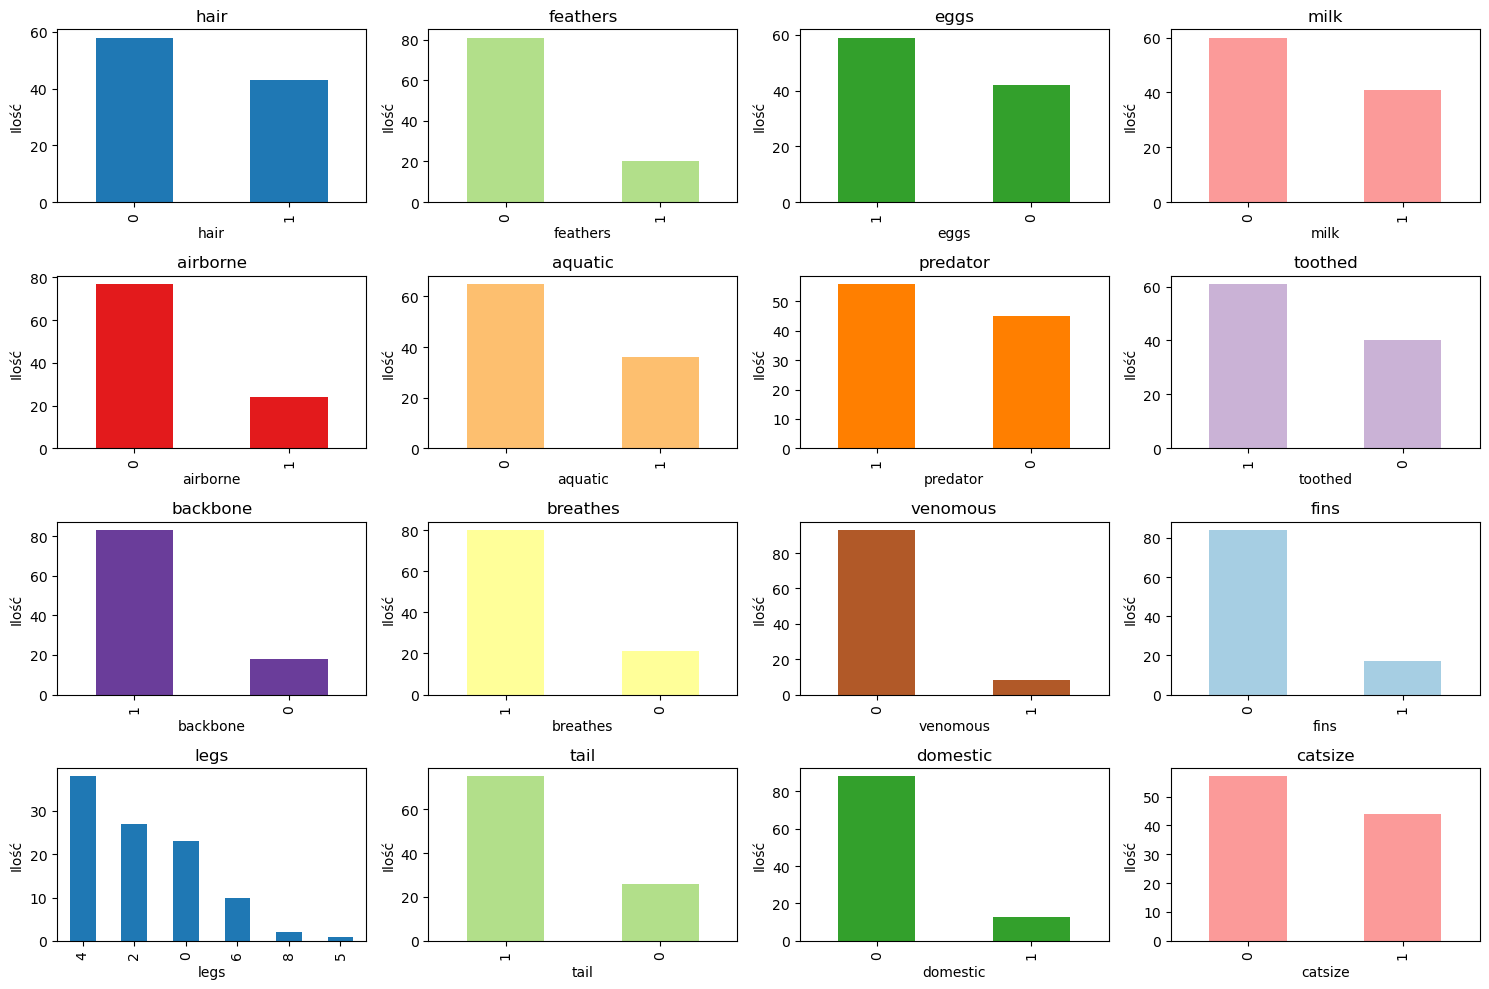

In [6]:
attributes_to_plot = zoo.columns[1:17]

# Stworzenie wykresów słupkowych dla każdego atrybutu
plt.figure(figsize=(15, 10))

num_colors = len(plt.cm.Paired.colors)

for i, attribute in enumerate(attributes_to_plot, 1):
    color_index = i % num_colors  # Oblicz resztę z dzielenia, aby uzyskać unikalny indeks koloru
    plt.subplot(4, 4, i)
    zoo[attribute].value_counts().plot(kind='bar', color=plt.cm.Paired(color_index))

    # Dodanie tytułu i etykiet osi
    plt.title(f'{attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Ilość')

plt.tight_layout()
plt.show()

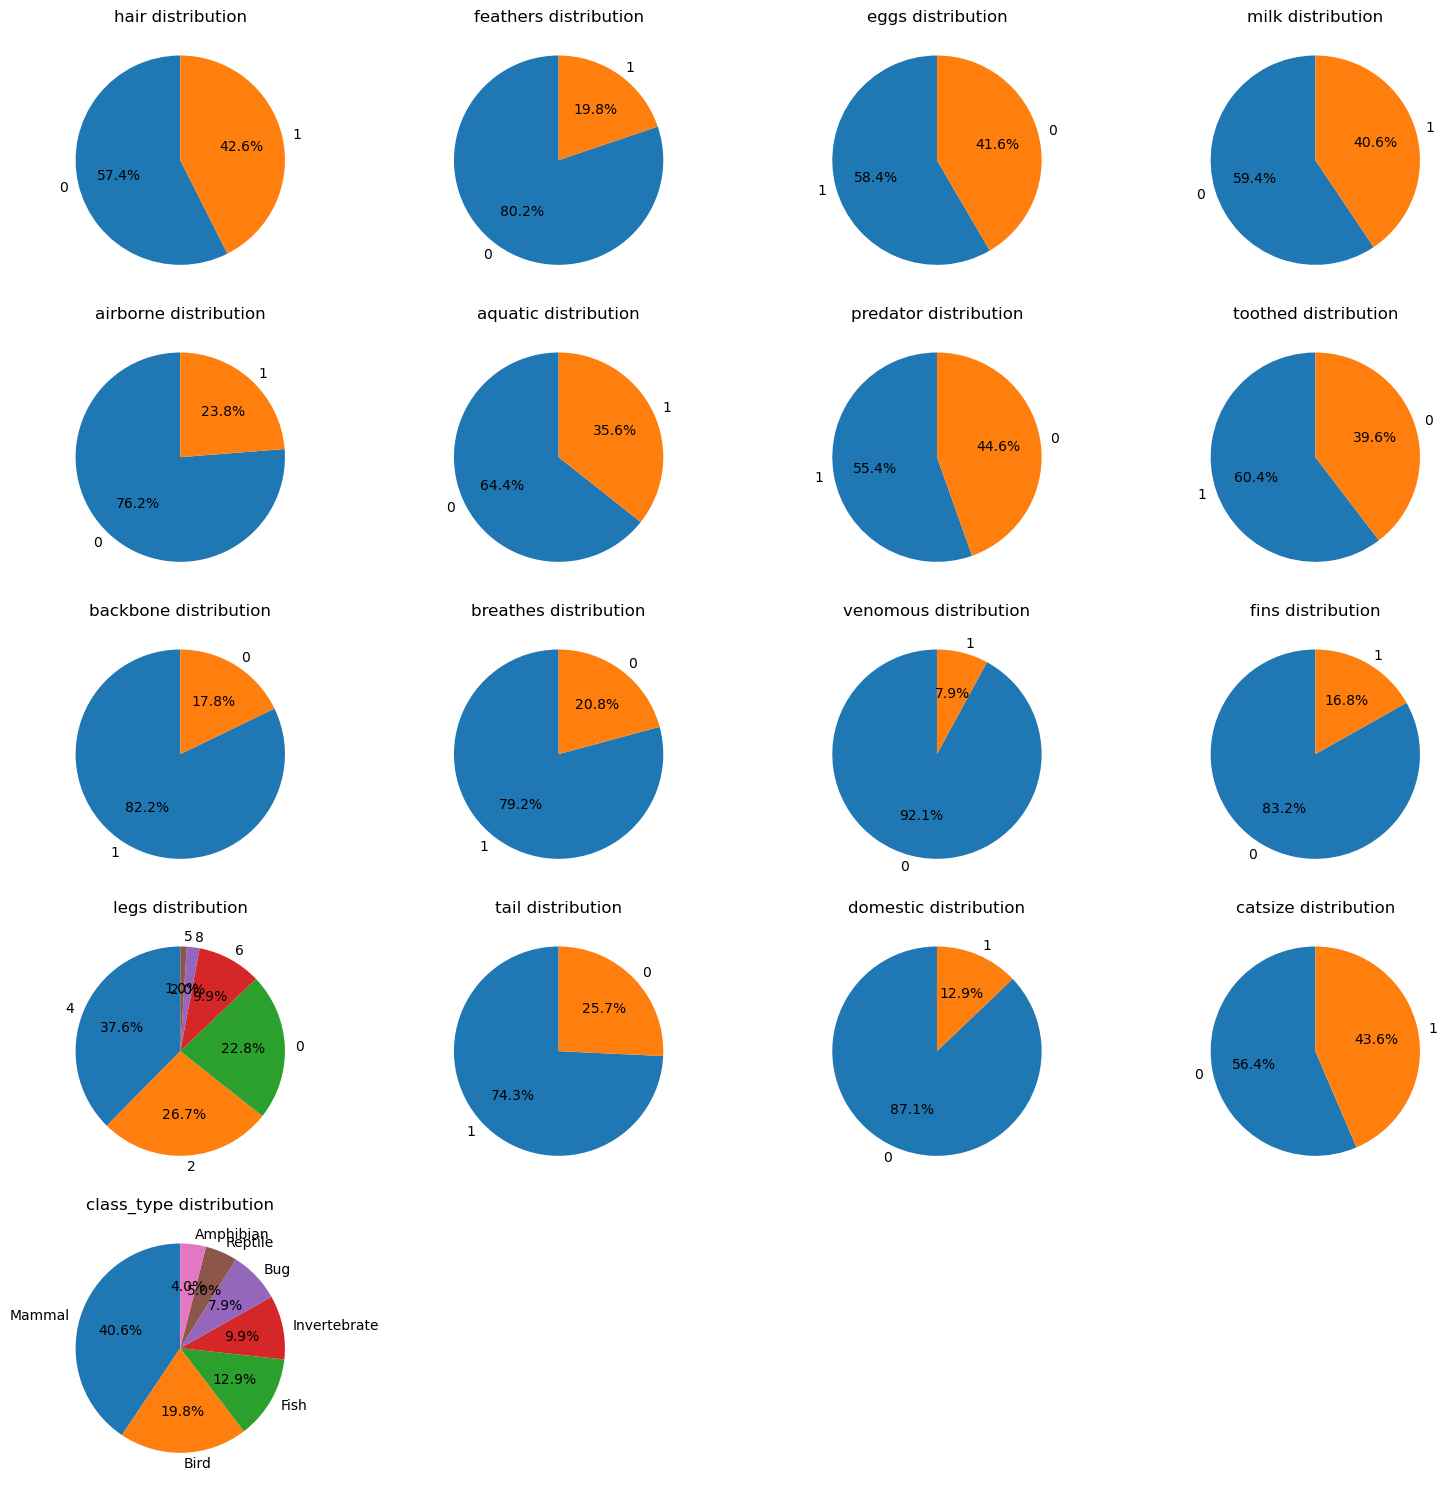

In [7]:


# Rozmiar siatki
num_cols = 4
num_rows = (len(zoo.columns) + num_cols - 1) // num_cols

# Tworzenie siatki wykresów
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iteracja przez wszystkie kolumny (pomijając pierwszą)
for i, column in enumerate(zoo.columns[1:]):
    row = i // num_cols
    col = i % num_cols

    labels = zoo[column].value_counts().index.tolist()
    values = zoo[column].value_counts().tolist()

    # Tworzenie wykresu kołowego
    axes[row, col].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f"{column} distribution")

# Usunięcie pustych podwykresów, jeśli liczba kolumn nie jest podzielna przez num_cols
for i in range(len(zoo.columns) - 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Wnioski: 
Wykresy przedstawiają porównanie ilości wszystkich zwierząt do ilości posiadania danych cech: hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize. Wszystkie atrybuty poza nogami (legs) określone są zero-jedynkowo - co oznacza, że gdy atrybut przyjmuje wartość 1 dane zwierzę go posiada, a gdy przyjmuje 0, atrybut ten nie występuje. 

Analiza danych zawartych w wykresach dostarcza cennych informacji dotyczących różnorodności cech występujących wśród badanych gatunków zwierząt. Przede wszystkim, istotne jest zauważenie, że atrybut hair, choć powszechny w ogólnej populacji, nie jest obecny u blisko sześćdziesięciu zwierząt. Ta obserwacja sugeruje, że chociaż włosy są powszechnie występującą cechą, istnieje także znaczna liczba gatunków zwierząt, które nie posiadają tego atrybutu. Może to wynikać z różnorodności ekosystemów, w których żyją te gatunki, oraz specyfiki ich biologii.

Podobnie, brak cech takich jak feathers czy domestic u większości zwierząt wskazuje na ich mniejsze znaczenie w kontekście całej populacji zwierząt. Jednakże, warto zastanowić się nad ewentualnymi korelacjami między tymi cechami a środowiskiem życia czy zachowaniami tych zwierząt. Na przykład, brak feathers może sugerować, że badane zwierzęta nie posiadają zdolności lotu, co może mieć istotne konsekwencje dla ich sposobu życia i sposobu zdobywania pożywienia.

Wydaje się, że atrybuty airborne, backbone i breathes są bardzo powszechne wśród analizowanych gatunków zwierząt, ponieważ występują one u blisko osiemdziesięciu z nich. To może sugerować, że zdolność do poruszania się w powietrzu oraz posiadanie kręgosłupa i zdolność do oddychania powietrzem są cechami istotnymi dla przetrwania i funkcjonowania zwierząt w różnych środowiskach.

Z kolei, cechy takie jak eggs, milk, catsize oraz predator, choć obecne u większości badanych gatunków, nie są uniwersalne i istnieje znaczna liczba zwierząt, które ich nie posiadają. To sugeruje, że istnieją różne strategie rozrodcze, sposoby odżywiania się oraz pozycje ekologiczne w hierarchii drapieżników, które mogą determinować obecność lub brak tych cech u poszczególnych gatunków.

Atrybut toothed, będący cechą obecną u ponad połowy zwierząt, może być istotny dla zrozumienia ich diety i sposobu zdobywania pożywienia. Zwierzęta posiadające zęby mogą być przystosowane do spożywania różnorodnych pokarmów, co może wpływać na ich rolę w ekosystemie oraz konkurencję z innymi gatunkami.

Natomiast, cechy takie jak venomous i fins są stosunkowo rzadkie w analizowanej próbie, co może świadczyć o ograniczonej adaptacyjnej wartości tych cech w porównaniu do innych. Istnieje wiele gatunków zwierząt, które nie posiadają jadowych gruczołów ani płetw, co sugeruje, że w wielu przypadkach inne strategie przetrwania lub sposoby dostosowania do środowiska są bardziej efektywne.

Ostatnim badanym atrybutem jest legs, który wykazuje dużą zróżnicowaną wśród badanych zwierząt. Większość z nich posiada cztery nogi, jednakże istnieje znacząca grupa zwierząt posiadających inne liczby nóg, co może być związane z różnymi sposobami poruszania się i przystosowania do różnych środowisk. Może to sugerować, że liczba nóg nie jest uniwersalnym kryterium dla klasyfikacji zwierząt i że istnieje duża różnorodność morfologiczna wśród badanych gatunków.

Podsumowując, analiza danych dotyczących cech występujących wśród zwierząt pozwala na lepsze zrozumienie ich różnorodności biologicznej oraz adaptacyjnych strategii przetrwania. Wskazuje także na istnienie pewnych cech powszechnych w populacji zwierząt, ale również na istnienie różnorodności i unikalności wśród poszczególnych gatunków.

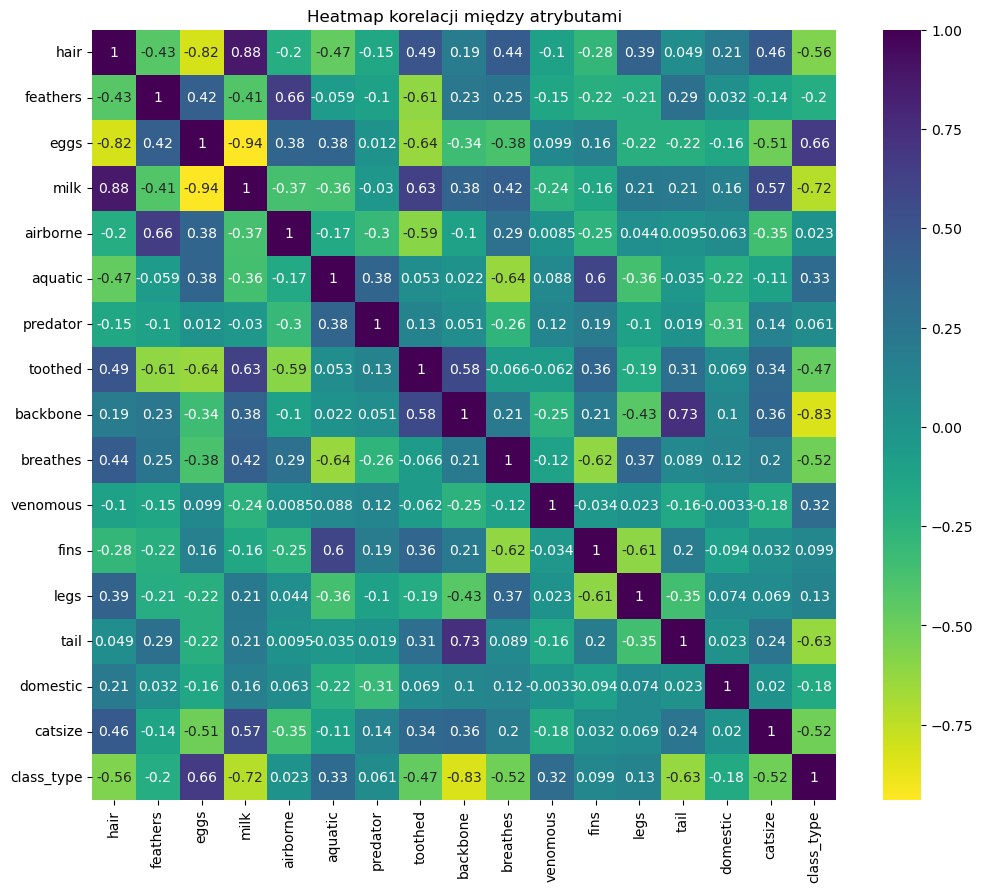

In [8]:
zoo['class_type'] = zoo['class_type'].map(class1.set_index('Class_Type')['Class_Number'])

attributes_to_heatmap = zoo.columns[1:]


# Stworzenie heatmapy
plt.figure(figsize=(12, 10))
heatmap_data = zoo[attributes_to_heatmap].corr()
sns.heatmap(heatmap_data, annot=heatmap_data, cmap="viridis_r")

# Dodanie tytułu
plt.title('Heatmap korelacji między atrybutami')

# Pokaż heatmapę
plt.show()

Wnioski: Korelacja bada czy istnieje zależność liniowa pomiędzy danymi atrybutami, jeśli atrybuty są silnie skorelowane to z jednego możemy zrezygnować, możemy także usunąc atrybuty, które nie wiele nam wnoszą do kategoryzacji. Brak korelacji występuje wtedy, kiedy wynik na macierzy jest bliski 0. Słabą korelacje można zauważyć dla atrybutów backbone i domestic, dla catsize i domestic, dla domestic i milk, dla venomousni feathers, dla venomous i hair, dla toothened i predator, dla predator i legs, dla venomous i domestic, dla fins i catsize, dla tail i bretahes. Dobrą korelację możemy zauważyć dla milk i hair oraz bacbone i tail. 
Analiza korelacji między atrybutami stanowi kluczowy krok w procesie zrozumienia struktury danych oraz ich potencjalnego wpływu na modelowanie i kategoryzację badanych zwierząt. Wyniki tej analizy są niezwykle wartościowe, ponieważ umożliwiają identyfikację zarówno silnie skorelowanych, jak i słabo skorelowanych atrybutów, co może mieć istotne implikacje dla procesu analizy danych.

Istnieje możliwość eliminacji jednego z atrybutów, jeśli między nimi istnieje silna zależność liniowa. Ta strategia, znana jako redukcja cech, może prowadzić do uproszczenia modeli, co z kolei ułatwia interpretację wyników oraz zmniejsza ryzyko nadmiernego dopasowania modelu do danych treningowych. Na przykład, jeśli atrybuty milk i hair są silnie skorelowane, to eliminacja jednego z nich może pomóc w redukcji złożoności modelu bez utraty istotnych informacji.

Z drugiej strony, warto również zwrócić uwagę na atrybuty, które nie wykazują znaczącej korelacji z innymi. W przypadku braku korelacji, wartość na macierzy korelacji jest bliska zeru, co sugeruje, że zmienne te są prawdopodobnie niezależne od siebie. W takich przypadkach można rozważyć usunięcie tych atrybutów, ponieważ nie wniosą one istotnych informacji do procesu kategoryzacji zwierząt.

Analiza korelacji pozwala także na lepsze zrozumienie charakterystyki danych oraz potencjalnych związków między poszczególnymi cechami. Na przykład, silna korelacja między milk a hair może wskazywać na istnienie związku między obecnością sierści a zdolnością do karmienia mlekiem wśród różnych gatunków. To odkrycie może prowadzić do dalszych badań nad ewolucyjnymi relacjami między tymi cechami oraz ich funkcjonalnym znaczeniem dla badanych zwierząt.

Warto również podkreślić, że usunięcie silnie skorelowanych atrybutów może prowadzić do poprawy interpretowalności wyników oraz zmniejszenia ryzyka nadmiernego dopasowania modelu. Ponadto, analiza korelacji między atrybutami dostarcza wglądu w charakterystykę danych, co może być przydatne w dalszych analizach oraz modelowaniu.

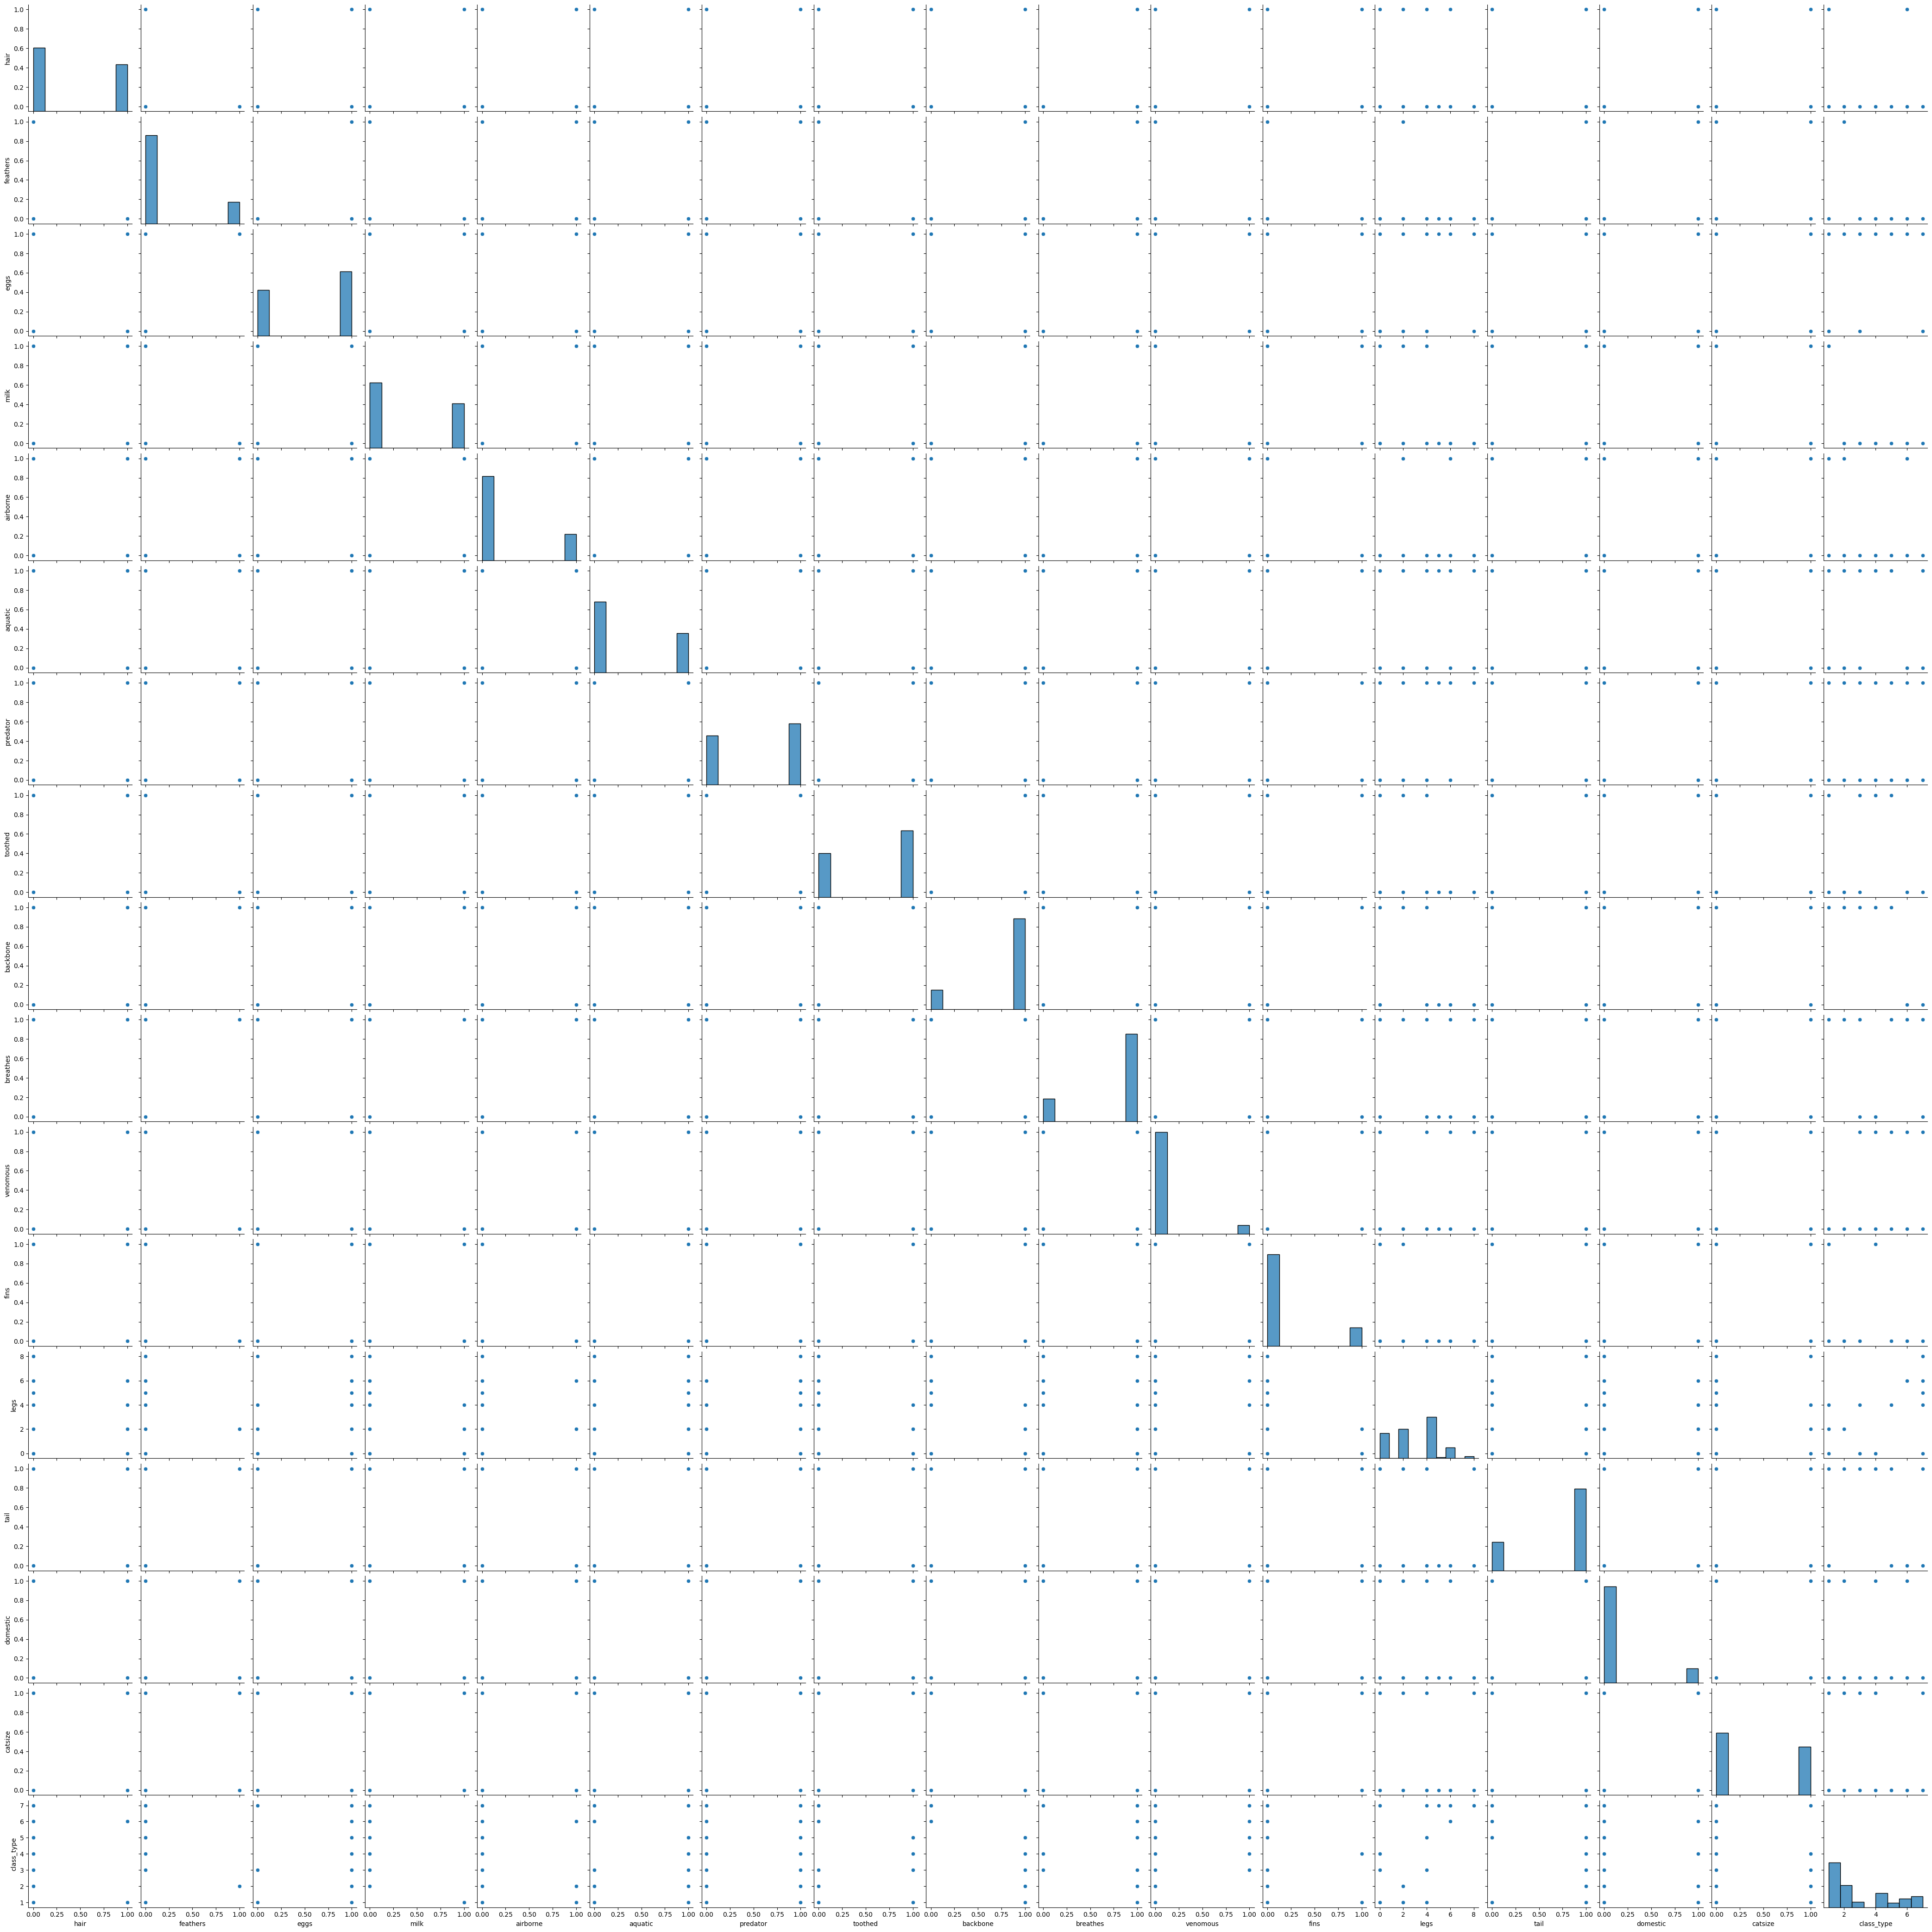

<Figure size 700x500 with 0 Axes>

In [9]:
sns.pairplot(zoo, kind="scatter")
plt.figure(figsize=(7,5),dpi=100)
plt.show()

Wykres ten wyświetla wykresy punktowe (scatter plots) dla wszystkich możliwych kombinacji par cech (kolumn) w zbiorze danych zoo. Każdy punkt na wykresie odpowiada jednej obserwacji w zbiorze danych, 
a osie odpowiadają wartościom poszczególnych cech.Wprowadzenie klasyfikatorów na takim zbiorze danych nie jest wykonalne ze względu na ich charakterystykę. 
Ogólnie rzecz biorąc, kod ten generuje wykresy punktowe dla wszystkich kombinacji par cech w zbiorze danych, co pozwala na wizualizację zależności między nimi oraz na szybkie zrozumienie struktury danych.
Rozwój klasyfikatorów na podstawie zbioru danych, który skupia się głównie na porównaniu elementów przyjmujących wartości 0 i 1, napotyka na trudności ze względu na ograniczoną ilość informacji dostępnych dla analizy.
Ograniczona dywersyfikacja w danych, gdzie większość cech jest binarna, czyli przyjmuje jedynie dwie możliwe wartości (0 lub 1), ogranicza możliwości modelowania i wyodrębniania wzorców charakterystycznych 
dla poszczególnych klas.

Klasyfikatory, takie jak algorytmy uczenia maszynowego, opierają się na wyodrębnianiu istotnych cech i wzorców z danych treningowych, które mogą następnie być wykorzystane do przewidywania klas nowych
obserwacji. Jednakże, gdy większość cech w zbiorze danych ma jedynie dwie możliwe wartości, możliwość wyodrębnienia znaczących wzorców staje się ograniczona.

Ponadto, ograniczenie danych do binarnych wartości sprawia, że trudniej jest zidentyfikować subtelne zależności czy niuanse między różnymi klasami. Klasyfikacja oparta na takich danych może być 
niewystarczająco precyzyjna i skuteczna, co prowadzi do ograniczeń w możliwościach ich zastosowania w praktyce.

Dlatego też, dla skutecznej klasyfikacji, konieczne jest posiadanie bardziej zróżnicowanych danych, które obejmują szeroki zakres cech i wartości, co pozwala na wyodrębnienie istotnych wzorców i relacji 
między nimi. W przypadku danych binarnych, skuteczność klasyfikatorów może być ograniczona, a wymagane jest rozszerzenie zbioru danych o bardziej zróżnicowane i bogate informacyjnie cechy.

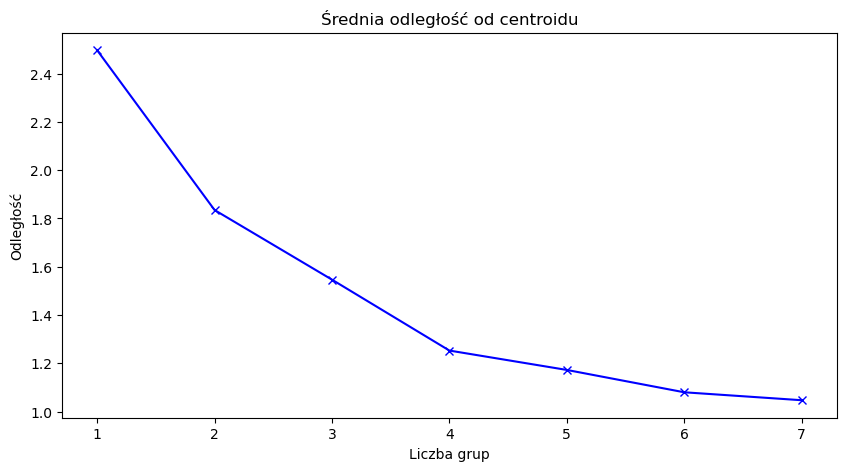

In [10]:
# Wczytaj dane z pliku CSV
df_org = pd.read_csv('zoo.csv')
df = df_org.drop(columns=['class_type', 'animal_name'])

# Maksymalna liczba klastrów
maks_k = 7

# Inicjalizuj listę dla przechowywania średnich odległości
srednia_odl = []

# Przeprowadź analizę klastrowania dla różnych liczności klastrów
for k in range(1, maks_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    srednia_odl.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Rysuj wykres
plt.figure(figsize=(10, 5))
plt.plot(range(1, maks_k + 1), srednia_odl, 'bx-')
plt.xlabel('Liczba grup')
plt.ylabel('Odległość')
plt.title('Średnia odległość od centroidu')
plt.show()


Wnioski:
Analiza klastrowania, jaką przeprowadza ten wykres, stanowi istotny krok w eksploracji danych, mający na celu zrozumienie ich naturalnej struktury poprzez grupowanie podobnych obserwacji. 
Przez przyjrzenie się zmianie średniej odległości od centroidów w zależności od liczby klastrów, staramy się ustalić optymalną liczbę klastrów, która najlepiej odzwierciedla zróżnicowanie danych.
Metoda łokcia, którą stosujemy, ma na celu wskazanie tego "optymalnego" punktu - tzn. takiej liczby klastrów, gdzie dalsze zwiększanie ich liczby nie przynosi już znaczącej poprawy w klastrowaniu. 
W idealnym scenariuszu, wykres miałby wyraźne "zagięcie", czyli punkt, w którym dodanie kolejnych klastrów przestaje istotnie zmieniać średnią odległość między punktami a ich centroidami.
Jednakże w naszym przypadku brak takiego wyraźnego "łokcia" wskazuje, że optymalna liczba klastrów może być bardziej subtelna i wymaga dodatkowej analizy. Mimo to, obserwujemy stopniowy spadek 
odległości w miarę wzrostu liczby klastrów, co sugeruje, że każde dodatkowe klastrowanie przynosi korzyść w postaci lepszego dopasowania klastrów do danych.
Warto zauważyć, że choć brak wyraźnego punktu łokcia, to stabilizacja spadku odległości jest widoczna w okolicach k = 4. Oznacza to, że dalsze zwiększanie liczby klastrów może nie przynieść znaczącej 
poprawy w jakości klastrowania, sugerując, że liczba klastrów powinna być ustalona na poziomie około 4.
Podsumowując, choć wykres nie prezentuje jednoznacznej odpowiedzi co do optymalnej liczby klastrów, dostarcza istotnych wskazówek dotyczących struktury danych i sugeruje, że liczba klastrów około 4 może być 
rozsądnym wyborem.